Webscraping Top 25 Stocks listed in NIFTY50 using requests and BeautifulSoup 


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

# Function to scrape Nifty50 data using requests and BeautifulSoup
def scrape_nifty50_data():
    # URL for Nifty50 stocks page (example: Screener.in or NSE)
    # Send a GET request to the website
    url ='https://www.screener.in/company/NIFTY/?page=1'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract relevant data from the page
    # (This will need to be customized based on the actual HTML structure of the page)
    stocks_data = []
    rows = soup.find_all('tr')  # Adjust to the actual table rows

    # Adjust the "Stock" column to extract only the actual stock names
    for row in rows[1:]:  # Skip header row
        cols = row.find_all('td')
        if len(cols) >= 9:  # Ensure row has enough columns
            stock_name = cols[0].text.strip().split(". ")[-1]  # Extract the stock name after the row number
            stocks_data.append({
            "Stock": stock_name,
            "PE": cols[1].text.strip(),
            "EPS": cols[2].text.strip(),
            "52 Week High": cols[3].text.strip(),
            "52 Week Low": cols[4].text.strip(),
            "LTP": cols[5].text.strip(),
            "Market Cap": cols[6].text.strip(),
            "Volume": cols[7].text.strip(),
            "% Change": cols[8].text.strip()
        })       

    # Convert the scraped data into a pandas DataFrame
    nifty50_df = pd.DataFrame(stocks_data)
    nifty50_df.reset_index(drop=True, inplace=True)
    return nifty50_df

# Main function to execute the workflow
def main():
    # Step 1: Scrape Nifty50 data
    nifty50_data = scrape_nifty50_data()
    print("Scraped Nifty50 Data:")
    pd.set_option('display.max_rows', None)
    print(nifty50_data)

   # Run the script
if __name__ == "__main__":
    main()


Scraped Nifty50 Data:
   Stock                PE       EPS 52 Week High 52 Week Low   LTP  \
0     1.  Reliance Industr   1272.85        25.36  1722467.61  0.39   
1     2.               TCS   4473.90        33.61  1618696.17  1.23   
2     3.         HDFC Bank   1871.75        20.68  1430928.71  1.04   
3     4.     Bharti Airtel   1681.75        71.04  1007452.46  0.48   
4     5.        ICICI Bank   1344.90        20.04   949165.22  0.74   
5     6.           Infosys   1999.70        30.81   830324.82  1.90   
6     7.    St Bk of India    861.55        10.04   768900.64  1.59   
7     8.               ITC    470.00        28.61   588008.16  2.93   
8     9.    Hind. Unilever   2390.10        54.64   561575.81  1.76   
9    10.   Larsen & Toubro   3887.00        39.70   534513.28  0.72   
10   11.  HCL Technologies   1968.80        31.75   534266.38  2.64   
11   12.     Bajaj Finance   7182.80        28.92   444612.78  0.50   
12   13.  Sun Pharma.Inds.   1813.45        38.83   435

Extracting OHLCV data from Yahoo library for 10 stocks listed in NIFTY50 and calculating returns

In [24]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol(s) for the stock(s)
tickers = ["NESTLEIND.NS", "TCS.NS", "COALINDIA.NS","INFY.NS", "BRITANNIA.NS"," ASIANPAINT.NS","ITC.NS","BEL.NS","BAJAJ-AUTO.NS","BPCL.NS"]  # Replace with your desired ticker(s)
start_date = "2018-01-01"
end_date = "2023-12-01"

# Fetch data for multiple stocks
ohlcv_data = {}
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    ohlcv_data[ticker] = data  # Store in a dictionary for later use

# Combine data into a single DataFrame (optional)
combined_data = pd.concat({ticker: data for ticker, data in ohlcv_data.items()}, axis=1)

# Display the first few rows of the combined data
print("\nCombined OHLCV Data:")
print(combined_data.head())

# Calculate daily returns
data['Daily Returns'] = data['Adj Close'].pct_change()

# Calculate cumulative returns
data['Cumulative Returns'] = (1 + data['Daily Returns']).cumprod() - 1

# Display the first few rows
print(data[['Adj Close', 'Daily Returns', 'Cumulative Returns']].head())
yearly_returns = data['Adj Close'].resample('Y').ffill().pct_change()
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()
print(yearly_returns.head())
print(monthly_returns.head())




Fetching data for NESTLEIND.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for TCS.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for COALINDIA.NS...


Fetching data for INFY.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for BRITANNIA.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for  ASIANPAINT.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for ITC.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for BEL.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for BAJAJ-AUTO.NS...


[*********************100%***********************]  1 of 1 completed


Fetching data for BPCL.NS...


[*********************100%***********************]  1 of 1 completed


Combined OHLCV Data:
           NESTLEIND.NS                                                      \
Price         Adj Close        Close         High          Low         Open   
Ticker     NESTLEIND.NS NESTLEIND.NS NESTLEIND.NS NESTLEIND.NS NESTLEIND.NS   
Date                                                                          
2018-01-01   713.439148   786.320007   790.159973   782.859985   790.000000   
2018-01-02   713.470703   786.354980   792.304993   784.299988   785.500000   
2018-01-03   713.157776   786.010010   793.500000   785.015015   790.000000   
2018-01-04   713.987854   786.924988   790.219971   783.900024   786.500000   
2018-01-05   712.853821   785.674988   788.400024   784.099976   784.630005   

                              TCS.NS                                         \
Price            Volume    Adj Close        Close         High          Low   
Ticker     NESTLEIND.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                         


C:\Temp\ipykernel_6452\1719070306.py:31: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = data['Adj Close'].resample('Y').ffill().pct_change()
C:\Temp\ipykernel_6452\1719070306.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()


Using T-Score, Z-Score and the confidence interval to plot the Probablity Distribution of RELIANCE on the basis of Daily Returns

[*********************100%***********************]  1 of 1 completed
c:\python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Confidence Interval for Daily Returns: (-0.0013885562841498436, 0.0015425290604273326)


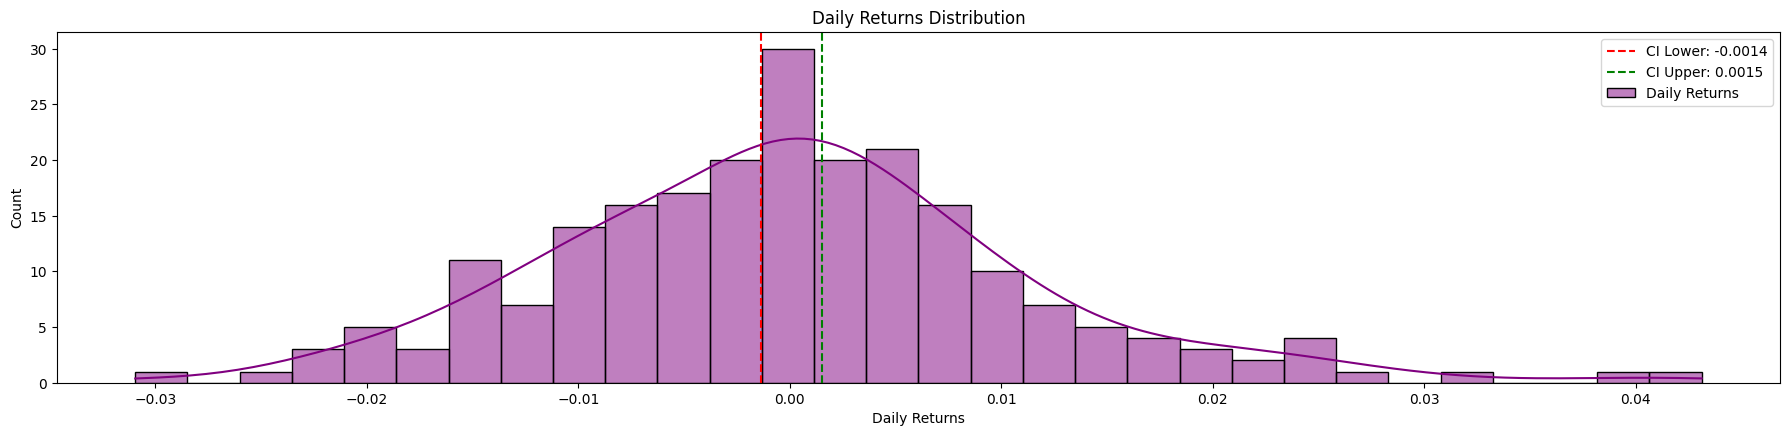

In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch stock data
ticker = "RELIANCE.NS"  # Replace with your ticker
start_date = "2023-01-01"
end_date = "2023-12-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Daily Returns'] = data['Adj Close'].pct_change()

# Drop NaN values
data.dropna(inplace=True)

# Calculate Z-score, T-score, and confidence intervals
def calculate_stats(series, confidence=0.95):
    n = len(series)
    mean = np.mean(series)
    std_dev = np.std(series, ddof=1)  # Sample standard deviation
    
    # Z-Score (standardized score)
    z_scores = (series - mean) / std_dev
    
    # T-Score (for small samples)
    t_scores = z_scores * np.sqrt(n)
    
    # Confidence Interval
    margin_of_error = stats.t.ppf((1 + confidence) / 2, n - 1) * (std_dev / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    return z_scores, t_scores, (ci_lower, ci_upper)

# Calculate for Daily Returns
z_returns, t_returns, ci_returns = calculate_stats(data['Daily Returns'])

# Print confidence intervals
print(f"Confidence Interval for Daily Returns: {ci_returns}")

# Plot Probability Distributions
plt.figure(figsize=(18, 12))

# Daily Returns Distribution
plt.subplot(3, 1, 3)
sns.histplot(data['Daily Returns'], kde=True, bins=30, color="purple", label="Daily Returns")
plt.axvline(ci_returns[0], color='red', linestyle='--', label=f"CI Lower: {ci_returns[0]:.4f}")
plt.axvline(ci_returns[1], color='green', linestyle='--', label=f"CI Upper: {ci_returns[1]:.4f}")
plt.title("Daily Returns Distribution")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
